# Project Setting

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [2]:
import src.modules.data_cleaning as dc
import src.modules.data_preprocessing as dp
from importlib import reload



In [3]:
global LSTM1_OUT_PATH, COLORS, DATA_ORIGINAL_PATH, PREDICT_START_DATE
COLORS = ['#636EFA', '#00CC96', '#EF553B', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
LSTM1_OUT_PATH = 'output/LSTM_1/'

DATA_ORIGINAL_PATH = 'data/'

PREDICT_START_DATE = '2021-07-08'

In [4]:
look_back = 365
prediction_days = 183 # 60
_epochs = 100
_batch_size = 1 # 64 #1 # 2

trend_type = 4 # 4 for FFT + Log space

```py
    trend_label_dict = {1: 'Fitted Trend', 
                    2: 'SARIMA Trend',
                    3: 'FFT Trend',
                    4: 'Log-FFT Trend'}
```

# Load Data

In [5]:
import pandas as pd
import os

# read the csv file back in
reload(dp)
df_FE_1a_daily_fill = pd.read_csv(os.path.join(f'output/df_FE_1a_daily_fill.csv'), index_col=0, parse_dates=True)

df_MP = dp.read_moonphase_data(DATA_ORIGINAL_PATH + 'Prague 2019-06-01 to 2022-01-14.csv')

# dc.print_df_with_dtypes(df_FE_1a_daily_fill, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='_df_FE_1a_daily_fill')

# dc.print_df_with_dtypes(df_MP, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='_df_MP')



<module 'src.modules.data_preprocessing' from '/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing.py'>

# Feature Engineering

<module 'src.modules.data_preprocessing' from '/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing.py'>

/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing.py:93: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * (x - x0)) + c


Unable to fit the exponential function.
Polynomial (n=1) parameters: [4.88846827e+02 2.16979478e+00 2.23084012e+03]
Polynomial (n=2) parameters: [-4.10332836e+02 -2.69636719e-04  2.59788765e+00  1.23143317e+02]


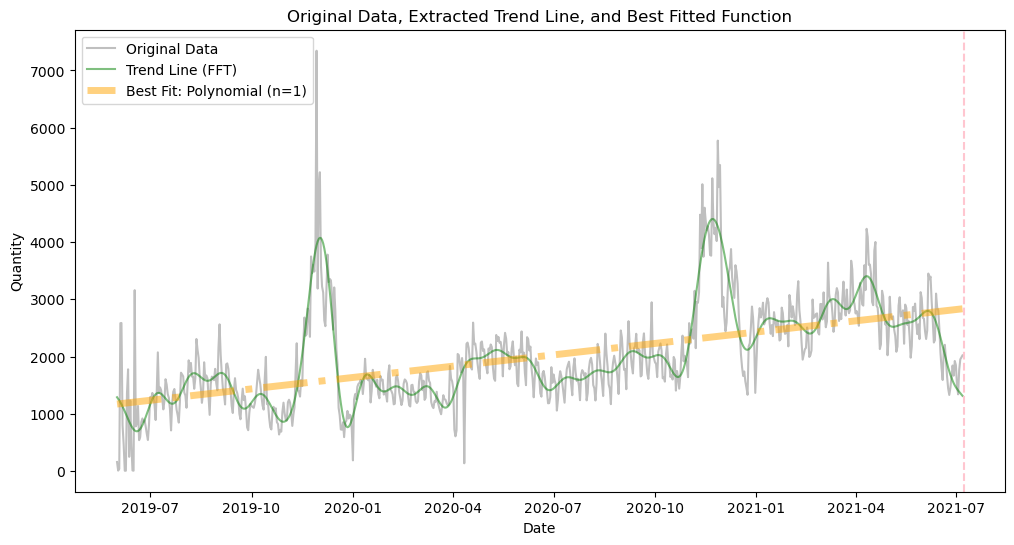

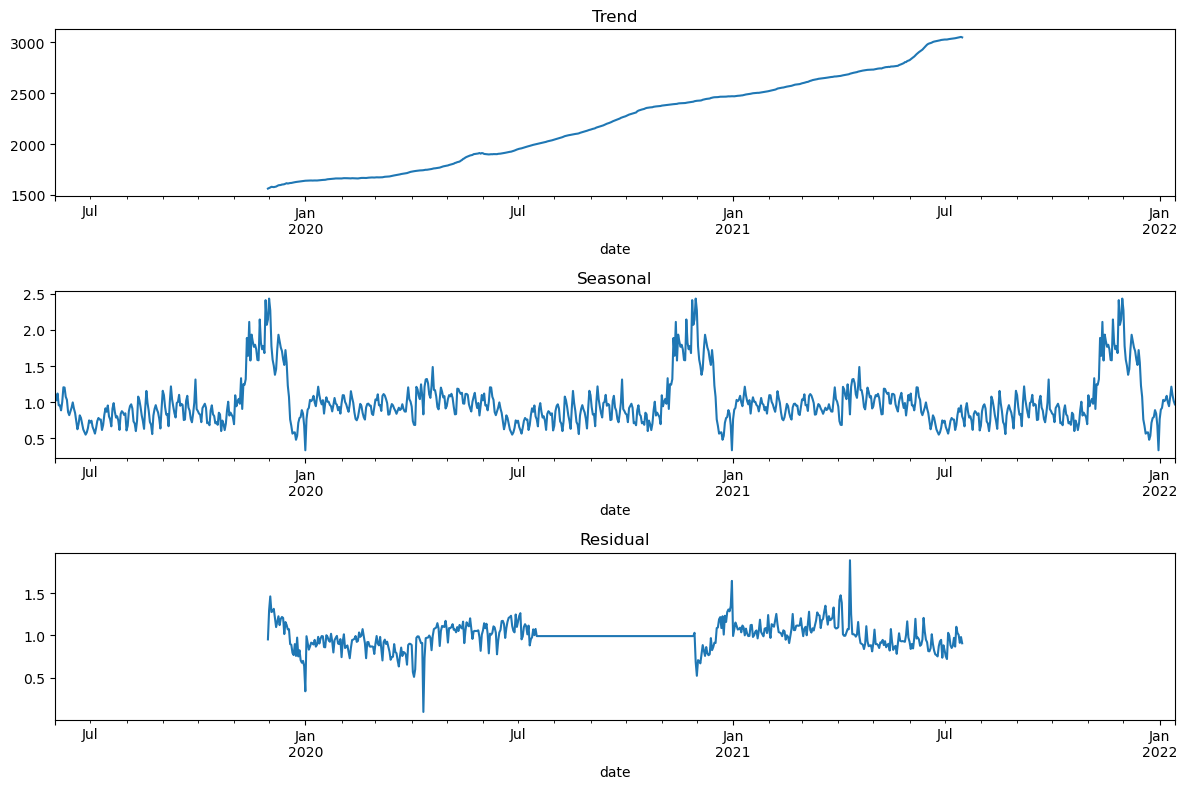

Best function: Polynomial (n=1)
MAE: 408.28284535853453, MRE: 0.21743947081454415


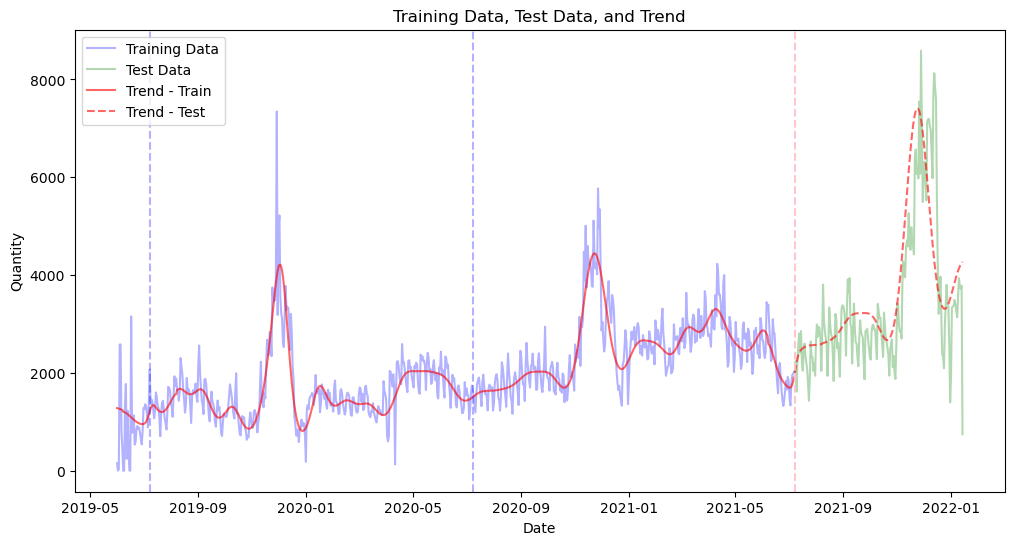

/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ds/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing.py:547: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1 / sample_frequency[:len(sample_frequency) // 2], fft_magnitude[:len(fft_magnitude) // 2])
/Users/ds/data_science/demand_prediction_data/src/modules/data_preprocessing.py:558: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  _ = plt.xlim(1 / sample_frequency[len(sample_frequency) // 2], 1 / sample_frequency[1])  # Set the x-axis limits to exclude 0 frequency


Cycles with most energy concentration: [384.0, 153.60000000000002, 69.81818181818183, 6.981818181818182, 59.07692307692308, 51.2, 96.0, 45.1764705882353, 30.720000000000006, 3.490909090909091]


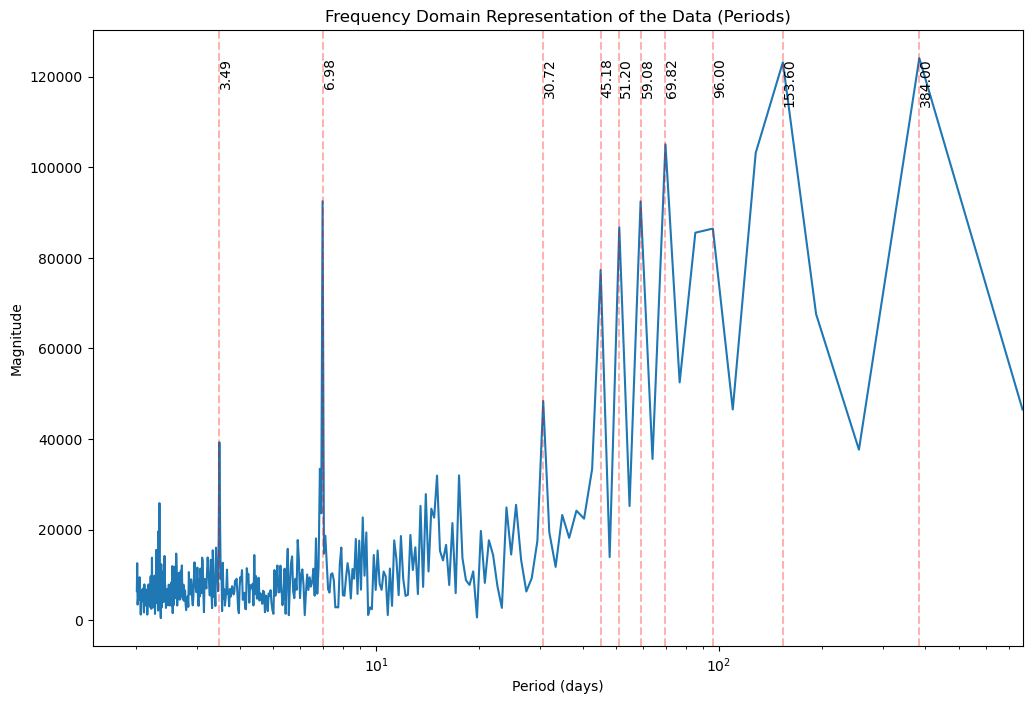

the most noticeable periods are:

 [384.0, 153.6, 69.82, 6.98, 59.08, 51.2, 96.0, 45.18, 30.72, 3.49] 




(959, 7)

+---------------------+--------------+----------+----------+----------------+----------------+---------------+----------------+
|                     |     quantity |     year |    month |   week_of_year |   day_of_month |   day_of_week | holiday        |
|                     |      float64 |   object |   object |         object |         object |        object | object         |
|                     |     NaN: 191 |   NaN: 0 |   NaN: 0 |         NaN: 0 |         NaN: 0 |        NaN: 0 | NaN: 0         |
|---------------------+--------------+----------+----------+----------------+----------------+---------------+----------------|
| 2019-06-01 00:00:00 | -1127.21     |     2019 |        6 |             22 |              1 |             5 | No             |
| 2019-06-02 00:00:00 | -1272.64     |     2019 |        6 |             22 |              2 |             6 | No             |
| 2019-06-03 00:00:00 | -1237.4      |     2019 |        6 |             23 |              3 |          

In [6]:

### Feature Engineering:

df_FE_1a_daily_fill.index.name = 'date'
reload(dp)

import numpy as np

# # Perform the log10 transform on the first column of the DataFrame
# df_FE_1a_daily_fill.iloc[:, 0] = np.log10(df_FE_1a_daily_fill.iloc[:, 0])


# df_FE_diff, df_trend = dp.auto_seasonality_TL(df_FE_1a_daily_fill, TL=True, NS=True, AS=False, num_AS=2, MP=True, moonphase_df=df_MP, truncate_date = PREDICT_START_DATE, predict_end_date='2022-01-14', trend_cycle_days=183, N=20)
df_FE_diff, df_trend = dp.auto_seasonality_TL3(df_FE_1a_daily_fill.copy(), TL=True, TL_type=trend_type, NS=True, AS=False, num_AS=2, MP=False, moonphase_df=df_MP, HL=True, truncate_date = PREDICT_START_DATE, predict_end_date='2022-01-14', trend_cycle_days=30, N=20, season=365)
df_FE_diff.shape
dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='df_FE_diff_FE1')



In [7]:
# # print the shape before dropping NaN
# print('shape before dropping NaN')
# df_FE_diff.shape
# # drop rows with NaN
# df_FE_diff = df_FE_diff.dropna()
# # print the shape after dropping NaN
# df_FE_diff.shape
# print('shape after dropping NaN')

df_FE_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 959 entries, 2019-06-01 to 2022-01-14
Freq: D
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      768 non-null    float64
 1   year          959 non-null    object 
 2   month         959 non-null    object 
 3   week_of_year  959 non-null    object 
 4   day_of_month  959 non-null    object 
 5   day_of_week   959 non-null    object 
 6   holiday       959 non-null    object 
dtypes: float64(1), object(6)
memory usage: 59.9+ KB


In [8]:

# dc.print_df_with_dtypes(df_trend, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='df_trend')

# print('df_FE_diff.shape:\n')
# df_FE_diff.shape

# print('df_FE_diff.head:\n')
# df_FE_diff.head()

# print('df_FE_diff.tail:\n')
# df_FE_diff.tail()

print('df_trend.shape:\n')
df_trend.shape

print('df_trend.head:\n')
df_trend.head(10)

print('df_trend.tail:\n')
df_trend.tail(10)

df_trend.shape:



(959, 1)

df_trend.head:



,quantity
2019-06-01,1284.205596
2019-06-02,1279.639844
2019-06-03,1274.403064
2019-06-04,1268.372597
2019-06-05,1261.428897
2019-06-06,1253.462791
2019-06-07,1244.382886
2019-06-08,1208.682170
2019-06-09,1204.842014
2019-06-10,1197.479941


df_trend.tail:



,quantity
2022-01-05,3848.508017
2022-01-06,3915.243460
2022-01-07,3978.940502
2022-01-08,4038.457087
2022-01-09,4092.850494
2022-01-10,4141.408279
2022-01-11,4183.667165
2022-01-12,4219.418112
2022-01-13,4248.697157
2022-01-14,4271.762850


In [9]:
# # drop the columns: 

# drop columns: day_of_month period_384.00 period_153.60
# df_FE_diff.drop(columns=['year', 'day_of_month', 'period_1'period_384.00', 53.60'], inplace=True)

# df_FE_diff.drop(columns=['year', 'day_of_month'], inplace=True)

# # period_59.08 |   period_96.00 |   period_51.20 |   period_45.18 |
# df_FE_diff.drop(columns=['period_384.00', 'period_96.00', 'period_153.60', 'period_69.82', 'period_59.08', 'period_96.00', 'period_51.20', 'period_45.18'], inplace=True)

# dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='EDA_quantity_sum_df')
dc.print_df_with_dtypes(df_FE_diff, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='df_FE_diff_after_drop')


+---------------------+--------------+----------+----------+----------------+----------------+---------------+----------------+
|                     |     quantity |     year |    month |   week_of_year |   day_of_month |   day_of_week | holiday        |
|                     |      float64 |   object |   object |         object |         object |        object | object         |
|                     |     NaN: 191 |   NaN: 0 |   NaN: 0 |         NaN: 0 |         NaN: 0 |        NaN: 0 | NaN: 0         |
|---------------------+--------------+----------+----------+----------------+----------------+---------------+----------------|
| 2019-06-01 00:00:00 | -1127.21     |     2019 |        6 |             22 |              1 |             5 | No             |
| 2019-06-02 00:00:00 | -1272.64     |     2019 |        6 |             22 |              2 |             6 | No             |
| 2019-06-03 00:00:00 | -1237.4      |     2019 |        6 |             23 |              3 |          

## One Hot Encode

In [10]:
import pandas as pd 

def one_hot_encode(df,start_col=1):
    # One-hot encode all columns except the first one
    ohe_df = pd.get_dummies(df, columns=df.columns[start_col:])

    # Sort columns by prefix, suffix in ascending order
    # sorted_columns = sorted(ohe_df.columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1]) if len(x.split('_')) > 1 else 0))

    # # Reorder the DataFrame with sorted columns
    # ohe_df = ohe_df[sorted_columns]

    return ohe_df

# One-hot encode the DataFrame
df_FE_diff_OHE = one_hot_encode(df_FE_diff,start_col=1)

df_FE_diff_OHE.shape
dc.print_df_with_dtypes(df_FE_diff_OHE, max_rows=200, print_on=True, data_generated_path=LSTM1_OUT_PATH, name_extension='_one_hot_encode')

(959, 116)

+---------------------+--------------+-------------+-------------+-------------+-------------+-----------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+---

<Axes: title={'center': 'df_trend'}>

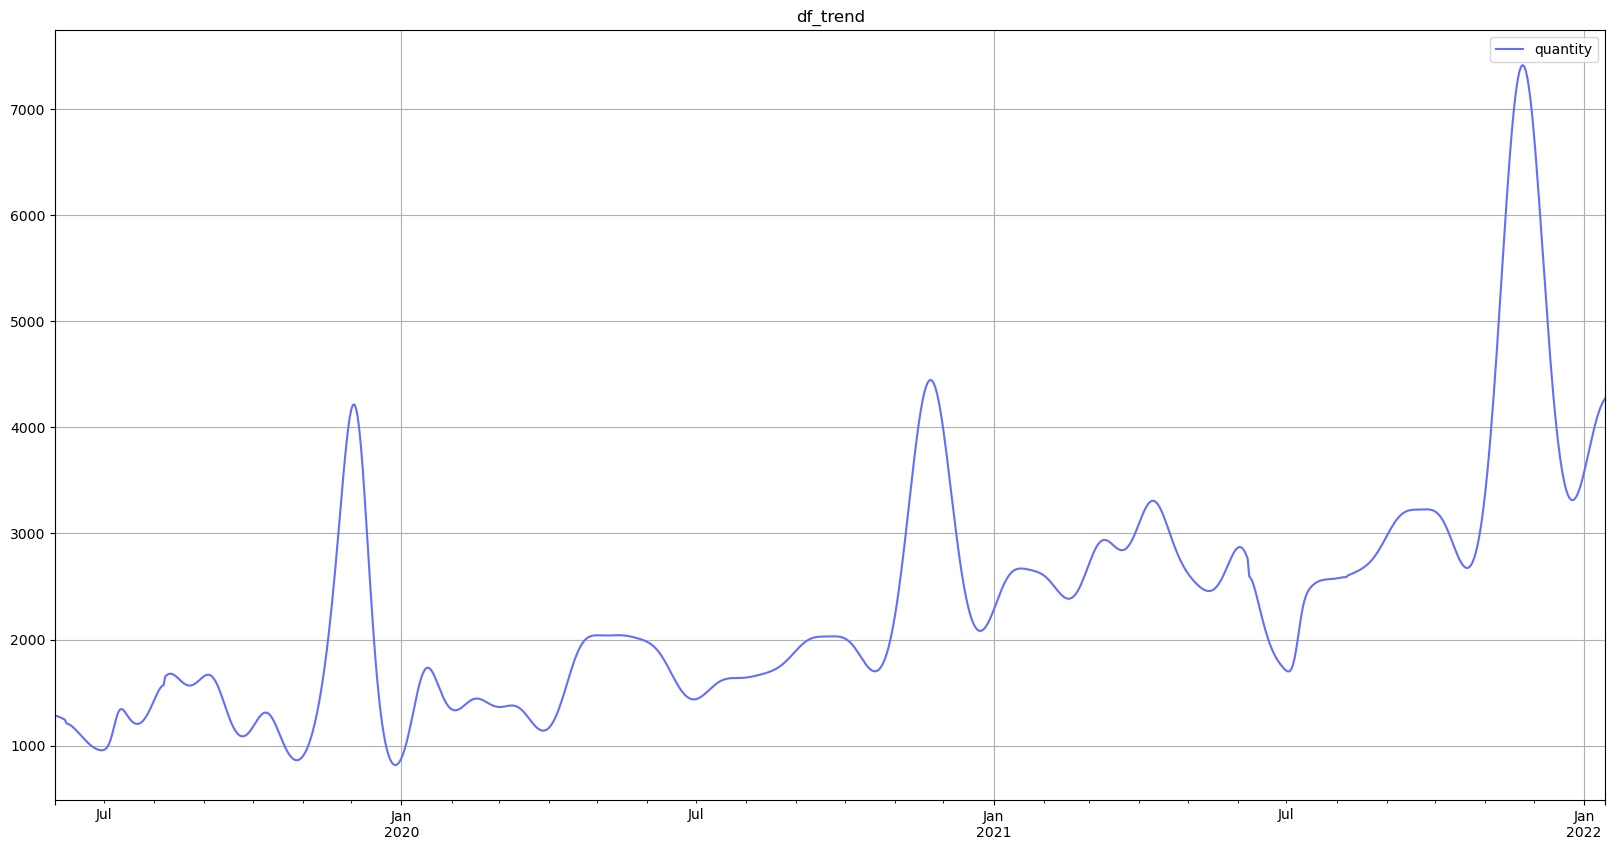

In [11]:
# plot df_trend

df_trend.plot(figsize=(20,10), color=COLORS[0], title='df_trend', grid=True)

## Two X LSTM



Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 365, 116)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 183, 115)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 365, 160)     177280      ['input_1[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 183, 160)     176640      ['input_2[0][0]']                
                  

2023-04-24 12:10:34.636456: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


221/221 - 12s - loss: 0.0115 - 12s/epoch - 55ms/step
Epoch 2/100
221/221 - 11s - loss: 0.0078 - 11s/epoch - 49ms/step
Epoch 3/100
221/221 - 10s - loss: 0.0066 - 10s/epoch - 46ms/step
Epoch 4/100
221/221 - 11s - loss: 0.0055 - 11s/epoch - 50ms/step
Epoch 5/100
221/221 - 11s - loss: 0.0050 - 11s/epoch - 48ms/step
Epoch 6/100
221/221 - 11s - loss: 0.0044 - 11s/epoch - 49ms/step
Epoch 7/100
221/221 - 10s - loss: 0.0042 - 10s/epoch - 43ms/step
Epoch 8/100
221/221 - 9s - loss: 0.0040 - 9s/epoch - 42ms/step
Epoch 9/100
221/221 - 9s - loss: 0.0040 - 9s/epoch - 42ms/step
Epoch 10/100
221/221 - 10s - loss: 0.0040 - 10s/epoch - 47ms/step
Epoch 11/100
221/221 - 10s - loss: 0.0039 - 10s/epoch - 46ms/step
Epoch 12/100
221/221 - 9s - loss: 0.0035 - 9s/epoch - 42ms/step
Epoch 13/100
221/221 - 9s - loss: 0.0034 - 9s/epoch - 42ms/step
Epoch 14/100
221/221 - 9s - loss: 0.0034 - 9s/epoch - 43ms/step
Epoch 15/100
221/221 - 9s - loss: 0.0032 - 9s/epoch - 42ms/step
Epoch 16/100
221/221 - 9s - loss: 0.0031 - 

Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

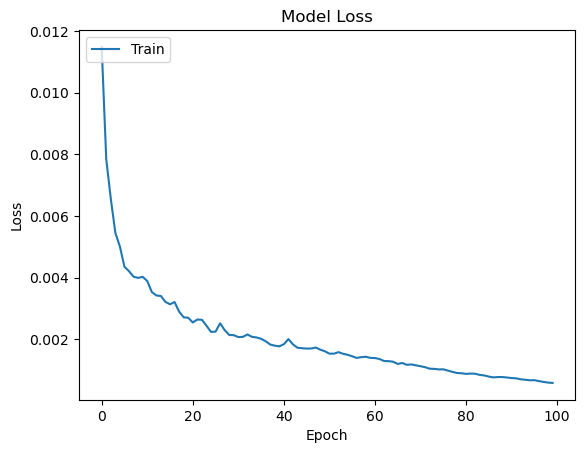

24

23

24

23

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Concatenate
from joblib import dump, load
from tensorflow.keras.models import Model

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def create_dataset(dataset, data_index, test_start_date='2021-07-08', look_back=1, prediction_days=1):
    test_start_idx = np.where(data_index == test_start_date)[0][0]
    X1, X2, Y = [], [], []
    for i in range(test_start_idx - look_back - prediction_days + 1):
        a = dataset[i:(i + look_back), :]
        X1.append(a)
        X2.append(dataset[i + look_back:i + look_back + prediction_days, 1:])
        Y.append(dataset[i + look_back:i + look_back + prediction_days, 0])
    return np.array(X1), np.array(X2), np.array(Y)

def create_dataset_X_only(dataset, data_index, test_start_date='2021-07-08', look_back=1, prediction_days=1):
    test_start_idx = np.where(data_index == test_start_date)[0][0]
    X1 = [dataset[test_start_idx-look_back:test_start_idx, :]]
    X2 = [dataset[test_start_idx:test_start_idx + prediction_days, 1:]]
    return np.array(X1), np.array(X2)



n_features = df_FE_diff_OHE.shape[1]  # Number of independent features

# Use the first 'n_features' columns for prediction
data = df_FE_diff_OHE

# Define the test_start_date
test_start_date = PREDICT_START_DATE

unique_suffix = f'{test_start_date}_{look_back}_{prediction_days}_{_epochs}_{_batch_size}'

# Split the data into training and testing sets before applying the MinMaxScaler
train = data
test = df_FE_1a_daily_fill[df_FE_1a_daily_fill.index >= test_start_date]


# Scale the training and testing sets separately using one scaler for all features
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

# Modify the function calls

X_train, X2_train, y_train = create_dataset(train_scaled, train.index, test_start_date=PREDICT_START_DATE, look_back=look_back, prediction_days=prediction_days)
X_predict, X2_predict = create_dataset_X_only(train_scaled, train.index, test_start_date=PREDICT_START_DATE, look_back=look_back, prediction_days=prediction_days)



n_features_X1 = X_train.shape[2]
n_features_X2 = X2_train.shape[2]

input_X1 = Input(shape=(X_train.shape[1], n_features_X1))
input_X2 = Input(shape=(X2_train.shape[1], n_features_X2))

lstm_X1 = LSTM(160, return_sequences=True)(input_X1)
dropout_X1 = Dropout(0.1)(lstm_X1)
lstm_X1_2 = LSTM(96, return_sequences=False)(dropout_X1)
dropout_X1_2 = Dropout(0.1)(lstm_X1_2)

lstm_X2 = LSTM(160, return_sequences=True)(input_X2)
dropout_X2 = Dropout(0.1)(lstm_X2)
lstm_X2_2 = LSTM(96, return_sequences=False)(dropout_X2)
dropout_X2_2 = Dropout(0.1)(lstm_X2_2)

concat = Concatenate()([dropout_X1_2, dropout_X2_2])

dense1 = Dense(352)(concat)
output = Dense(prediction_days)(dense1)

model = Model(inputs=[input_X1, input_X2], outputs=output)
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit([X_train, X2_train], y_train, epochs=_epochs, batch_size=_batch_size, verbose=2)

# Generate the predictions using the trained model
train_predict = model.predict([X_train, X2_train])
y_predict = model.predict([X_predict, X2_predict])

# get the scaler parameters for the 'quantity' feature

quantity_scale = scaler.scale_[0]
quantity_min = scaler.min_[0]

# Manually calculate the inverse transformation for the 'quantity' feature

train_predict = (train_predict - quantity_min) / quantity_scale

# Manually calculate the inverse transformation for the 'quantity' feature in y_predict
y_predict = (y_predict - quantity_min) / quantity_scale



# Update the train and test dates
train_dates = train[train.index < test_start_date].index
test_dates = train[train.index >= test_start_date].index

# Get the dates for y_predict, which should be in the test dataset's range
# prediction_dates = pd.date_range(train.index[-1] + pd.Timedelta(days=1), periods=prediction_days, freq='D')
prediction_dates = train[train.index >= test_start_date].index[:prediction_days]





# Plot training and validation loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig(os.path.join(LSTM1_OUT_PATH, f'LSTM1_iteration_{unique_suffix}.png'), dpi=300)
plt.show()


# df_trend 's index range from test_start_date , number of prediction_days, 's value:



# df_trend.index >=test_start_date and len = prediction_days subset is:
test_trend = df_trend[(df_trend.index >= pd.Timestamp(test_start_date)) & (df_trend.index < pd.Timestamp(test_start_date) + pd.Timedelta(days=prediction_days))]


train_trend = df_trend[(df_trend.index < pd.Timestamp(test_start_date)) ]


# Convert test_trend.iloc[:,0] to a 2D numpy array with shape (1, 183)
test_trend_array = test_trend.iloc[:,0].to_numpy().reshape(1, -1)
train_trend_array = train_trend.iloc[:,0].to_numpy().reshape(1, -1)

# Add the two arrays together
y_predict = + y_predict + test_trend_array 
# train_predict = train_predict + train_trend_array # must be added in the plotting

# Calculate evaluation metrics
rmse = math.sqrt(mean_squared_error(test[:prediction_days]['quantity'], y_predict.T))
mae = mean_absolute_error(test[:prediction_days]['quantity'], y_predict.T)
mape = mean_absolute_percentage_error(test[:prediction_days]['quantity'], y_predict.T)
r2 = r2_score(test[:prediction_days]['quantity'], y_predict.T)


# Save evaluation metrics to a txt file
with open(os.path.join(LSTM1_OUT_PATH, f'LSTM1_report_{unique_suffix}.txt'), 'w') as f:
    f.write(f'RMSE: {rmse}\n')
    f.write(f'MAE: {mae}\n')
    f.write(f'MAPE: {mape}\n')
    f.write(f'R2: {r2}\n')

# Save the model to an h5 file
model.save(os.path.join(LSTM1_OUT_PATH, f'LSTM1_model_{unique_suffix}.h5'))


# Save the prediction to a csv file
prediction_df = pd.DataFrame(y_predict.reshape(-1,1), columns=['quantity'], index=prediction_dates)
prediction_df.to_csv(os.path.join(LSTM1_OUT_PATH, f'LSTM1_prediction_{unique_suffix}.csv'))



------

# Result Visualization

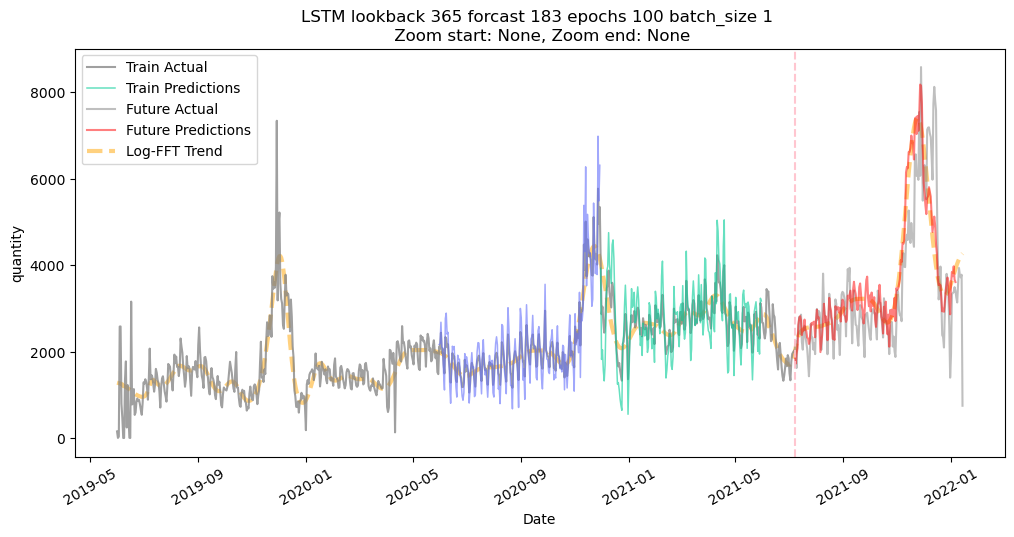

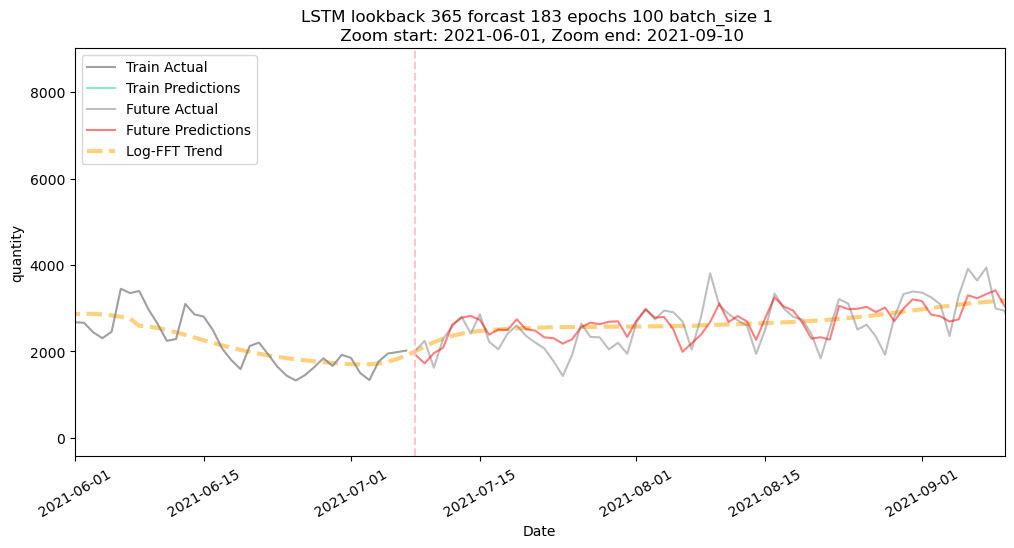

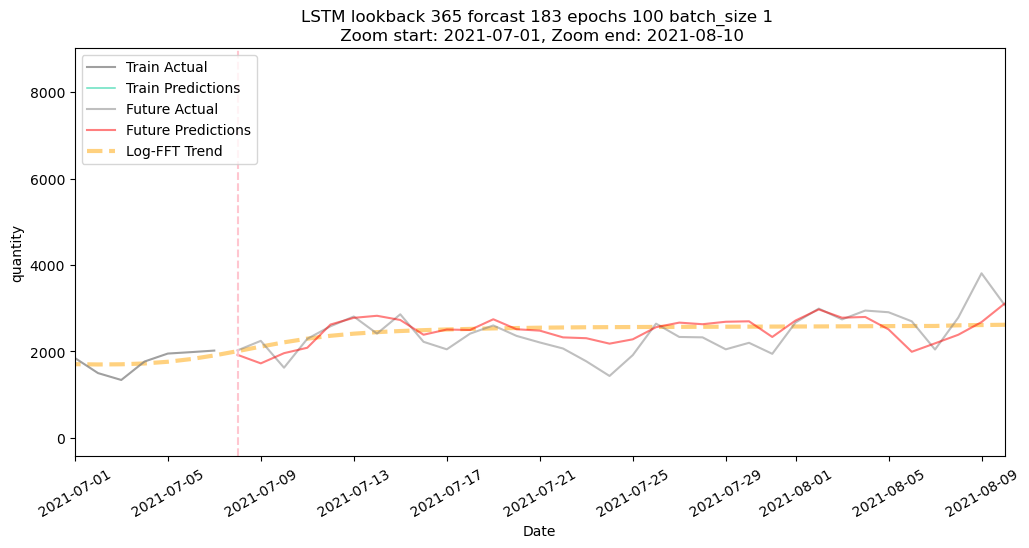

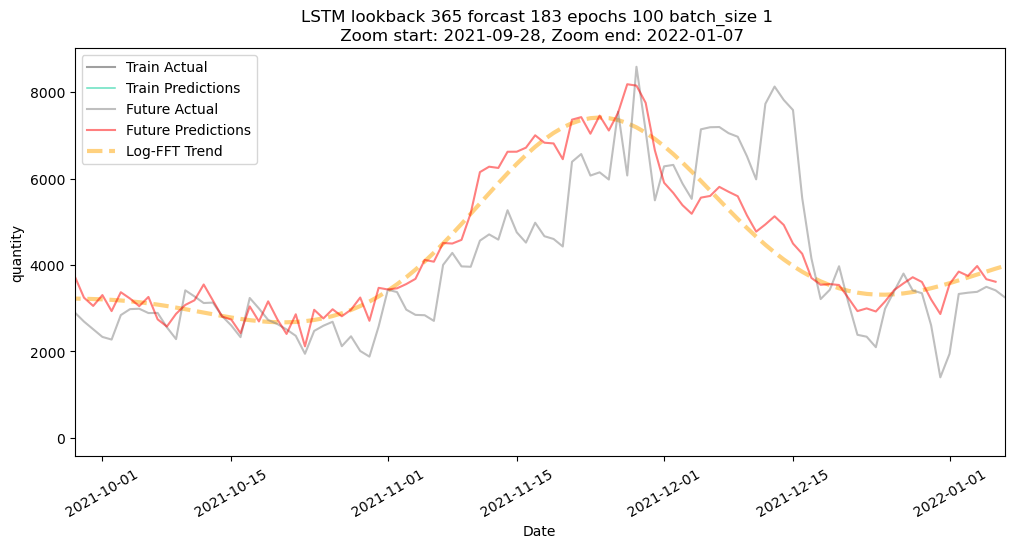

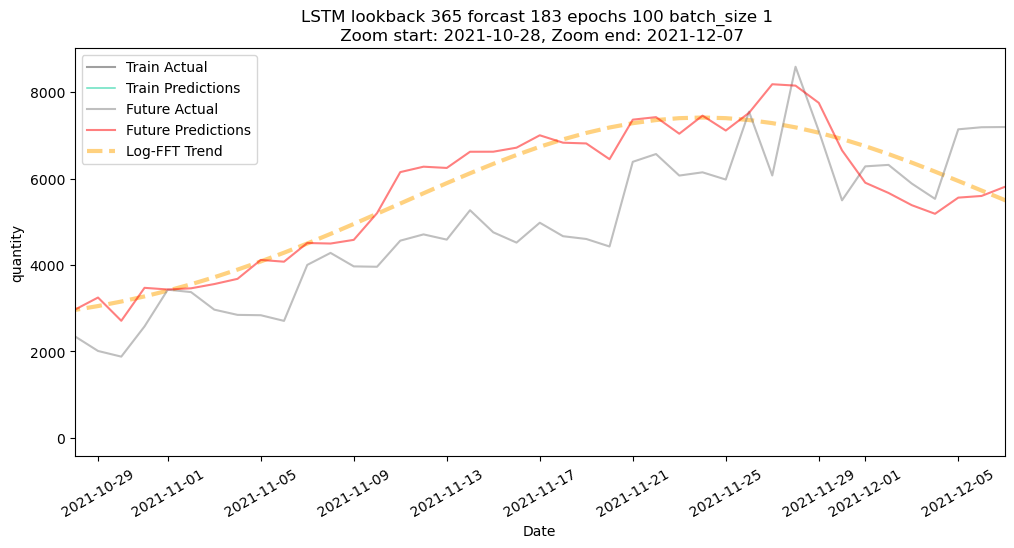

In [13]:
def plot_predictions(df_trend, train, test, train_predict, y_predict, prediction_dates, look_back, prediction_days, batch_size, zoom_start=None, zoom_end=None, plot_step=183, trend_type=3):
    
    trend_label_dict = {1: 'Fitted Trend', 
                    2: 'SARIMA Trend',
                    3: 'FFT Trend',
                    4: 'Log-FFT Trend'}
    
    
    first_column_name = test.columns[0]

    fig, ax = plt.subplots(figsize=(12, 6))

    train_with_trend = train.iloc[:, 0] + df_trend.iloc[:, 0]
    
    trend_line,  = plt.plot(df_trend.index, df_trend, color='orange', alpha=0.5, label=trend_label_dict[trend_type], linestyle='--', linewidth=3)
    
    # Plot the actual training data
    train_actual, = plt.plot(train.index, train_with_trend[:train.shape[0]], color='grey', alpha=0.75, label='Train Actual')

    # Plot the actual test data
    test_actual = plt.plot(test.index, test, color='grey', alpha=0.5, label='Future Actual')
    
    # Initialize the train_pred variable
    train_pred = None

    # Plot the given plot_step train predictions
    for idx, i in enumerate(range(0, len(train_predict), plot_step)):
        train_pred, = plt.plot(train.index[i + look_back:i + look_back + prediction_days], (train_with_trend[i + look_back:i + look_back + prediction_days] + train_predict[i]), color=COLORS[idx % len(COLORS)], alpha=0.6, linewidth=1.1)

    # Plot the future predictions
    future_pred, = plt.plot(prediction_dates, y_predict[0], color='red', alpha=0.5, label='Future Predictions')

    # Add a vertical red dashed line on the first date of prediction_dates
    plt.axvline(x=prediction_dates[0], color='pink', alpha=0.9, linestyle='--')

    # Customize the plot
    plt.legend([train_actual, train_pred, test_actual[0], future_pred, trend_line], ['Train Actual', 'Train Predictions', 'Future Actual', 'Future Predictions', f'{trend_label_dict[trend_type]}'], loc='upper left')
    plt.xticks(rotation=30)
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel('Date')
    plt.ylabel(first_column_name)

    # Apply the zoom range
    if zoom_start is not None or zoom_end is not None:
        ax.set_xlim(pd.to_datetime(zoom_start), pd.to_datetime(zoom_end))

    # Add zoom dates to the title
    zoom_start_str = zoom_start if zoom_start is not None else 'None'
    zoom_end_str = zoom_end if zoom_end is not None else 'None'
    plt.title(f'LSTM lookback {look_back} forcast {prediction_days} epochs {_epochs} batch_size {batch_size} \n Zoom start: {zoom_start_str}, Zoom end: {zoom_end_str}')

    # Save the plot as a PNG file
    file_name = os.path.join(LSTM1_OUT_PATH, f'LSTM_lookback_{look_back}_forcast_{prediction_days}_epochs_{_epochs}_batch_size_{batch_size}_step_{plot_step}_zoom_start_{zoom_start_str}_zoom_end_{zoom_end_str}.png')
    plt.savefig(file_name, dpi=300)
    plt.show()
    

plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, plot_step=max(150,prediction_days), trend_type=trend_type)
plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-06-01', zoom_end='2021-09-10', plot_step=max(150,prediction_days), trend_type=trend_type) 
plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-07-01', zoom_end='2021-08-10', plot_step=max(150,prediction_days), trend_type=trend_type)
plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-09-28', zoom_end='2022-01-07', plot_step=max(150,prediction_days), trend_type=trend_type)
plot_predictions(df_trend, train.loc[train_dates], test, train_predict, y_predict, prediction_dates, look_back, prediction_days, _batch_size, zoom_start='2021-10-28', zoom_end='2021-12-07', plot_step=max(150,prediction_days), trend_type=trend_type)
